In [2]:
final.sum_PE.max()

695.0

In [11]:
#prepare basemaps
basemap=geopandas.read_file('DATA/shp_new/Oesterreich_BEV_VGD_LAM.shp')
basemap.KG_NR=basemap.KG_NR.astype(int)
basemap.to_crs(epsg=4326,inplace=True)

#isolate BL
oebo_base=basemap[basemap.BL=='Niederösterreich']

#unify polygons
BL=oebo_base.geometry.unary_union
BL=geopandas.GeoDataFrame(geometry=[BL], crs=oebo_base.crs)


In [12]:
#getting relative values
final['%before_reg']=final.before_reg/final.freq*100
final['%no_nitri']=final.no_nitri/final.freq*100



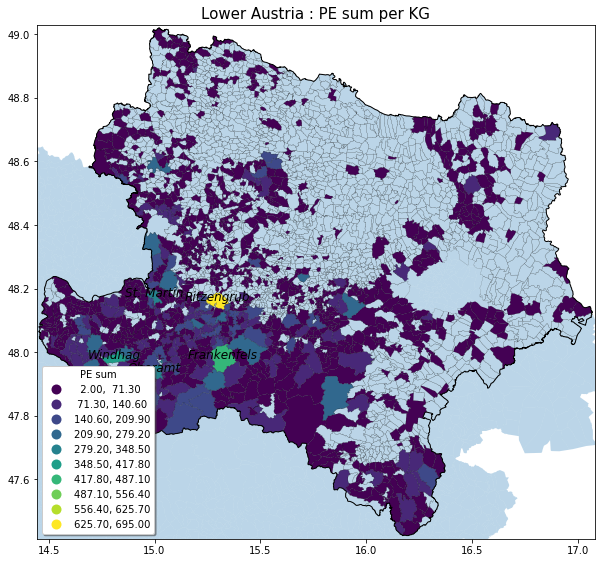

In [5]:
#plot for PE
fig,ax=plt.subplots(1,figsize=(10,15))
basemap.plot(ax=ax, alpha=0.3)
ax.set_title('Lower Austria : PE sum per KG', fontsize=15)
final.plot(column='sum_PE', ax=ax,legend=True,scheme='equal_interval', k=10, legend_kwds={'loc':'lower left', 'shadow':'True','title':'PE sum'})

#plot KG boundaries
oebo_base.geometry.boundary.plot(edgecolor='k', linewidth=0.1, ax=ax)

#print BL boundary
BL.exterior.plot(edgecolor='k', linewidth=1, ax=ax)

#get tot extent of data and zoom in to figure
minx, miny, maxx, maxy=oebo_base.total_bounds
ax.set_xlim(minx-0.01,maxx+0.01)
ax.set_ylim(miny-0.01,maxy+0.01)

#only label first 5 bezirke 
final.sort_values('sum_PE', inplace=True, ascending=False)
final.head().apply(lambda x: ax.annotate(text=x.KG, xy=x.geometry.centroid.coords[0], ha='center',fontsize='large', fontstyle='oblique', color='black'), axis=1)


plt.savefig('plots/noe_PE_sum.png', bbox_inches='tight')

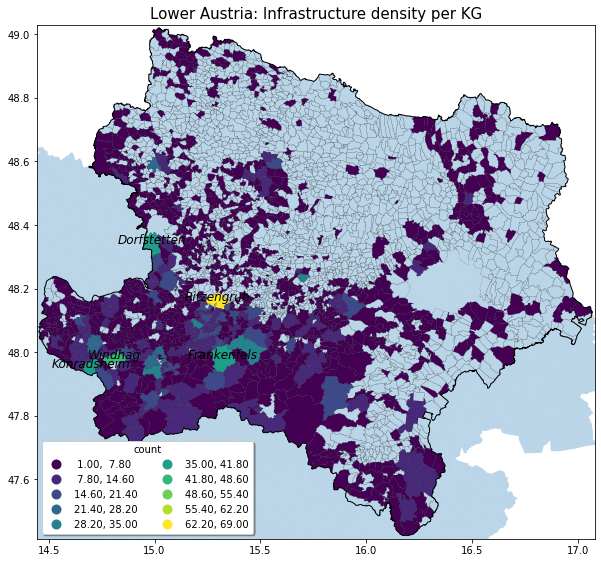

In [26]:
#plot for total infrastructure density
fig,ax=plt.subplots(1,figsize=(10,15))
basemap.plot(ax=ax, alpha=0.3)
ax.set_title('Lower Austria: Infrastructure density per KG', fontsize=15)
final.plot(column='freq', ax=ax,legend=True,scheme='equal_interval', k=10, legend_kwds={'loc':'lower left', 'shadow':'True','title':'count', 'ncol':2})


oebo_base.geometry.boundary.plot(edgecolor='k', linewidth=0.1, ax=ax)

#return only boundary of BL works fine
BL=oebo_base.geometry.unary_union
BL=geopandas.GeoDataFrame(geometry=[BL], crs=oebo_base.crs)
BL.exterior.plot(edgecolor='k', linewidth=1, ax=ax)

minx, miny, maxx, maxy=oebo_base.total_bounds

ax.set_xlim(minx-0.01,maxx+0.01)
ax.set_ylim(miny-0.01,maxy+0.01)



#only label first 5 bezirke 
final.sort_values('freq', inplace=True, ascending=False)
final.head().apply(lambda x: ax.annotate(text=x.KG, xy=x.geometry.centroid.coords[0], ha='center',fontsize='large', fontstyle='oblique', color='black'), axis=1)


plt.savefig('plots/noe_freq.png',bbox_inches='tight')


(47.412186418960125, 49.03052551962186)

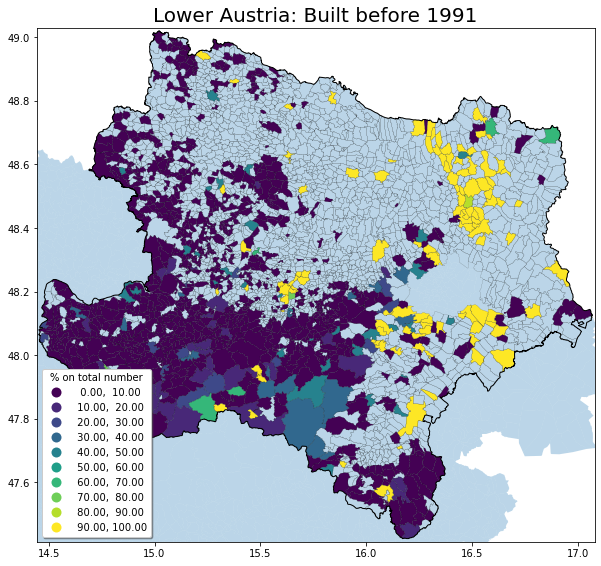

In [11]:
#plot for old infrastructure density. how many have been built before 1991?
fig,ax=plt.subplots(1,figsize=(10,15))
basemap.plot(ax=ax, alpha=0.3)
final.plot(column='%before_reg', ax=ax,legend=True,scheme='equal_interval', k=10, legend_kwds={'loc':'lower left', 'shadow':'True','title':'% on total number'})
ax.set_title('Lower Austria: Built before 1991', fontsize=20)


oebo_base.geometry.boundary.plot(edgecolor='k', linewidth=0.1, ax=ax)

#return only boundary of BL works fine
BL.exterior.plot(edgecolor='k', linewidth=1, ax=ax)

minx, miny, maxx, maxy=oebo_base.total_bounds
ax.set_xlim(minx-0.01,maxx+0.01)
ax.set_ylim(miny-0.01,maxy+0.01)

#only label first 5 bezirke 
#final.sort_values('%before_reg', inplace=True, ascending=False)
#final[final['%before_reg']>89.9].apply(lambda x: ax.annotate(text=x.KG, xy=x.geometry.centroid.coords[0], ha='center',fontsize='large', fontstyle='oblique', color='black'), axis=1)

#plt.savefig('plots/before_reg.png',bbox_inches='tight')


(47.412186418960125, 49.03052551962186)

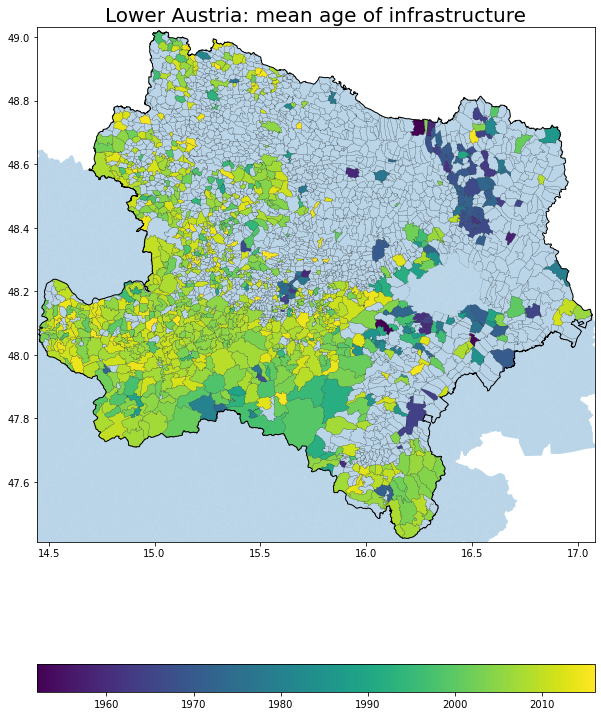

In [13]:
#plot for age
fig,ax=plt.subplots(1,figsize=(10,15))
basemap.plot(ax=ax, alpha=0.3)
final.plot(column='mean_year', ax=ax, legend=True, legend_kwds={ 'orientation':'horizontal'}  )
ax.set_title('Lower Austria: mean age of infrastructure', fontsize=20)

oebo_base.geometry.boundary.plot(edgecolor='k', linewidth=0.1, ax=ax)

#return only boundary of BL works fine

BL.exterior.plot(edgecolor='k', linewidth=1, ax=ax)

minx, miny, maxx, maxy=oebo_base.total_bounds

ax.set_xlim(minx-0.01,maxx+0.01)
ax.set_ylim(miny-0.01,maxy+0.01)

#plt.savefig('plots/age_1.png',bbox_inches='tight')

(47.412186418960125, 49.03052551962186)

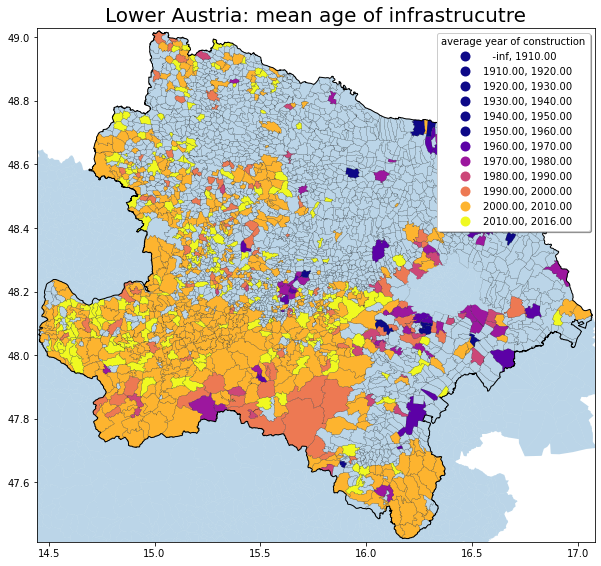

In [16]:
#plot for old infrastructure density
fig,ax=plt.subplots(1,figsize=(10,15))
basemap.plot(ax=ax, alpha=0.3)
bins=[1910,1920,1930,1940,1950,1960,1970,1980,1990,2000,2010]
final.plot(column='mean_year', ax=ax,cmap='plasma' ,legend=True, scheme='UserDefined',
 classification_kwds={'bins': bins},legend_kwds={'shadow':'True','title':'average year of construction'})
ax.set_title('Lower Austria: mean age of infrastrucutre', fontsize=20)

oebo_base.geometry.boundary.plot(edgecolor='k', linewidth=0.1, ax=ax)

#return only boundary of BL works fine

BL.exterior.plot(edgecolor='k', linewidth=1, ax=ax)

minx, miny, maxx, maxy=oebo_base.total_bounds

ax.set_xlim(minx-0.01,maxx+0.01)
ax.set_ylim(miny-0.01,maxy+0.01)

#plt.savefig('plots/age_2.png',bbox_inches='tight')

(47.412186418960125, 49.03052551962186)

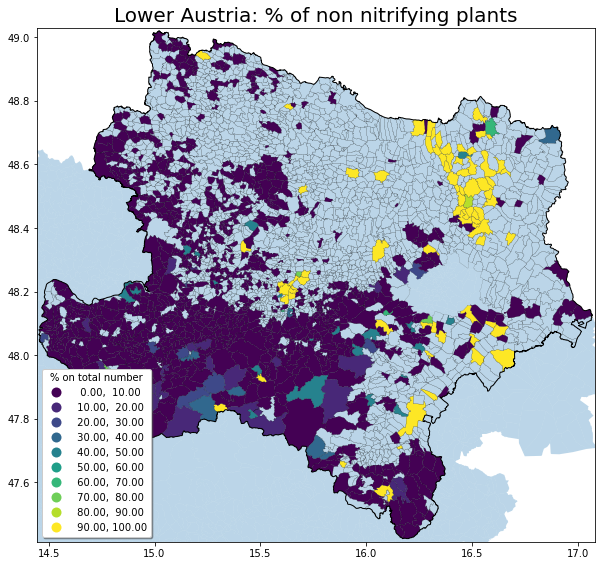

In [13]:
#plot for old infrastructure density. % of non nitrifying palnts per KG
fig,ax=plt.subplots(1,figsize=(10,15))
basemap.plot(ax=ax, alpha=0.3)
final.plot(column='%no_nitri', ax=ax,legend=True,scheme='equal_interval', k=10, legend_kwds={'loc':'lower left', 'shadow':'True','title':'% on total number'})
ax.set_title('Lower Austria: % of non nitrifying plants', fontsize=20)


oebo_base.geometry.boundary.plot(edgecolor='k', linewidth=0.1, ax=ax)

#return only boundary of BL works fine

BL.exterior.plot(edgecolor='k', linewidth=1, ax=ax)

minx, miny, maxx, maxy=oebo_base.total_bounds

ax.set_xlim(minx-0.01,maxx+0.01)
ax.set_ylim(miny-0.01,maxy+0.01)



#only label first 5 bezirke 
#final.sort_values('%no_nitri', inplace=True, ascending=False)
#final.head().apply(lambda x: ax.annotate(text=x.KG, xy=x.geometry.centroid.coords[0], ha='center',fontsize='large', fontstyle='oblique', color='white'), axis=1)
#plt.savefig('plots/no_nitri.png',bbox_inches='tight')

(47.412186418960125, 49.03052551962186)

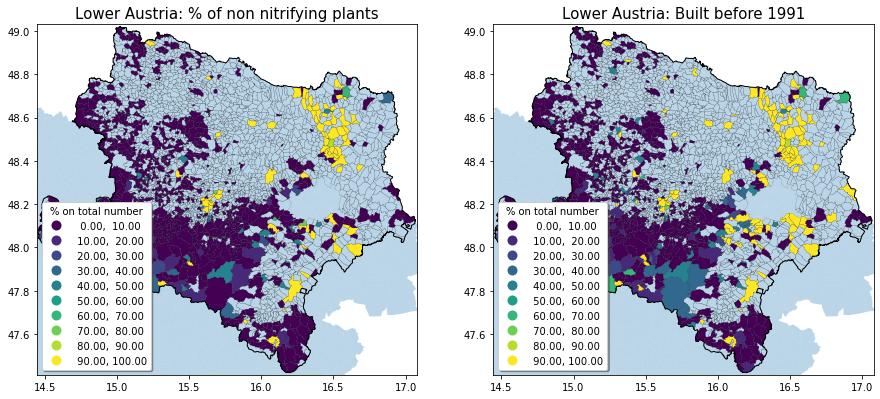

In [14]:
fig,ax=plt.subplots(1,2,figsize=(15,10))
basemap.plot(ax=ax[0], alpha=0.3)
basemap.plot(ax=ax[1], alpha=0.3)


ax[0].set_title('Lower Austria: % of non nitrifying plants', fontsize=15)
final.plot(column='%no_nitri', ax=ax[0],legend=True,scheme='equal_interval', k=10, legend_kwds={'loc':'lower left', 'shadow':'True','title':'% on total number'})

#plot KG boundaries
oebo_base.geometry.boundary.plot(edgecolor='k', linewidth=0.1, ax=ax[0])
#print BL boundary
BL.exterior.plot(edgecolor='k', linewidth=1, ax=ax[0])
#get tot extent of data and zoom in to figure
minx, miny, maxx, maxy=oebo_base.total_bounds
ax[0].set_xlim(minx-0.01,maxx+0.01)
ax[0].set_ylim(miny-0.01,maxy+0.01)

#plot 2
ax[1].set_title('Lower Austria: Built before 1991', fontsize=15)
final.plot(column='%before_reg', ax=ax[1],legend=True,scheme='equal_interval', k=10, legend_kwds={'loc':'lower left', 'shadow':'True','title':'% on total number'})

#plot KG boundaries
oebo_base.geometry.boundary.plot(edgecolor='k', linewidth=0.1, ax=ax[1])
#print BL boundary
BL.exterior.plot(edgecolor='k', linewidth=1, ax=ax[1])
#get tot extent of data and zoom in to figure
ax[1].set_xlim(minx-0.01,maxx+0.01)
ax[1].set_ylim(miny-0.01,maxy+0.01)

#plt.savefig('plots/no_nitri+before_reg.png', bbox_inches='tight')

(47.412186418960125, 49.03052551962186)

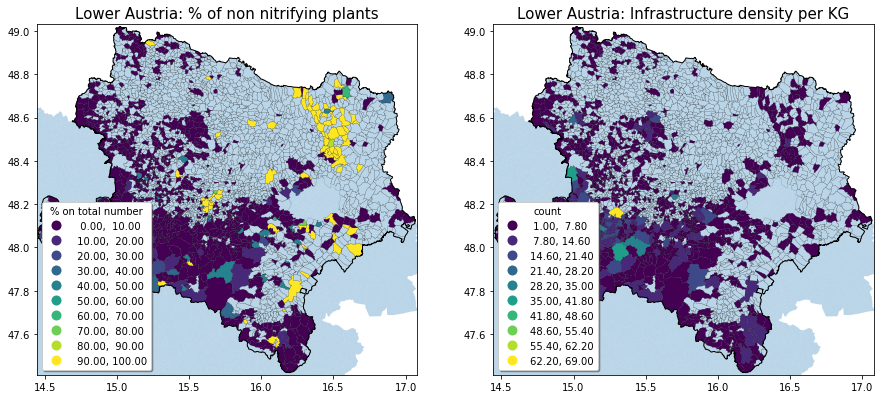

In [15]:
fig,ax=plt.subplots(1,2,figsize=(15,10))
basemap.plot(ax=ax[0], alpha=0.3)
basemap.plot(ax=ax[1], alpha=0.3)


ax[0].set_title('Lower Austria: % of non nitrifying plants', fontsize=15)
final.plot(column='%no_nitri', ax=ax[0],legend=True,scheme='equal_interval', k=10, legend_kwds={'loc':'lower left', 'shadow':'True','title':'% on total number'})
#plot KG boundaries
oebo_base.geometry.boundary.plot(edgecolor='k', linewidth=0.1, ax=ax[0])
#print BL boundary
BL.exterior.plot(edgecolor='k', linewidth=1, ax=ax[0])
#get tot extent of data and zoom in to figure
minx, miny, maxx, maxy=oebo_base.total_bounds
ax[0].set_xlim(minx-0.01,maxx+0.01)
ax[0].set_ylim(miny-0.01,maxy+0.01)

#plot 2
ax[1].set_title('Lower Austria: Infrastructure density per KG', fontsize=15)
final.plot(column='freq', ax=ax[1],legend=True,scheme='equal_interval', k=10, legend_kwds={'loc':'lower left', 'shadow':'True','title':'count'})

#plot KG boundaries
oebo_base.geometry.boundary.plot(edgecolor='k', linewidth=0.1, ax=ax[1])
#print BL boundary
BL.exterior.plot(edgecolor='k', linewidth=1, ax=ax[1])
#get tot extent of data and zoom in to figure
minx, miny, maxx, maxy=oebo_base.total_bounds
ax[1].set_xlim(minx-0.01,maxx+0.01)
ax[1].set_ylim(miny-0.01,maxy+0.01)

#plt.savefig('plots/no_nitri+freq.png', bbox_inches='tight')